# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing

In [3]:
gold_data = pd.read_csv('gld_price_data.csv')

In [24]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [25]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [26]:
gold_data.shape

(2290, 6)

In [27]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [28]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [29]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation:
1. Positive Correlation
2. Negative Correlation

In [30]:
correlation = gold_data.corr()

C:\Users\Faizan computer\AppData\Local\Temp\ipykernel_9224\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

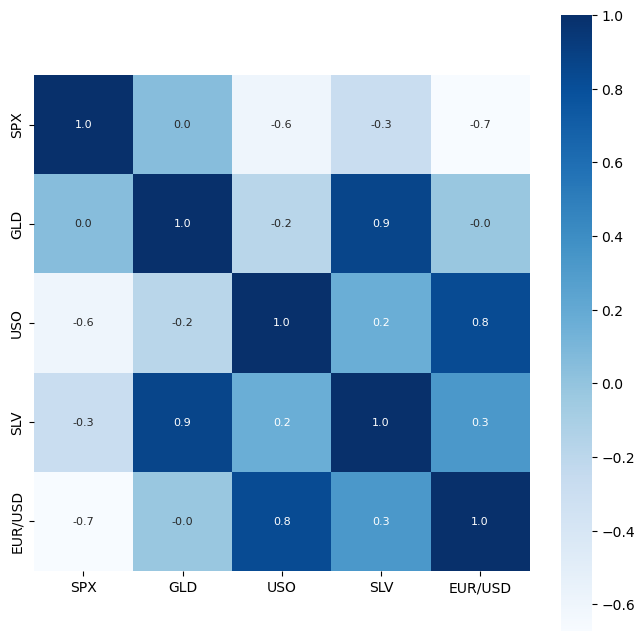

In [34]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [35]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Faizan computer\AppData\Local\Temp\ipykernel_9224\4227780549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

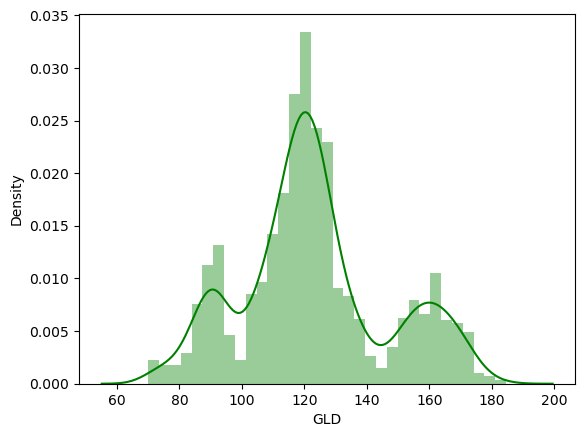

In [36]:
sns.distplot(gold_data['GLD'],color='green')

# Splitting the Features and Target

In [37]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [39]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [40]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

# Splitting into Training data and Test Data

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

# Model Training: Random Forest Regressor


In [42]:
regressor = RandomForestRegressor(n_estimators=100)

In [43]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

## Model Evaluation

In [44]:
test_data_prediction = regressor.predict(X_test)

In [45]:
print(test_data_prediction)

[168.45189913  81.79349966 116.39639992 127.73840053 120.7494011
 154.62969722 150.0806985  126.09030059 117.6127987  125.96150082
 116.534501   171.98600127 141.45639806 167.79809813 115.15030045
 117.81020063 137.23210281 170.27020077 159.84180318 158.27449972
 155.09770042 125.56160034 175.45230022 157.57430267 125.33700079
  93.70929972  77.49420025 120.68269986 119.06489936 167.50190027
  88.38620006 125.15330018  91.09990094 117.71470027 121.17059919
 136.88980014 115.57250077 115.01650089 145.95949909 107.20680112
 104.21950238  87.36959813 126.52250066 117.88149971 154.07799912
 119.46910001 108.41359992 107.89799828  93.10200063 127.02719786
  75.21820042 113.57839939 121.16549966 111.48559926 118.86579875
 120.76179954 160.06039973 167.88360106 146.95589641  85.55779863
  94.32460056  86.78059894  90.62250007 118.84490074 126.45960048
 127.38650023 169.61859997 122.36559951 117.2684991   98.86450041
 168.07260131 143.40299855 131.99430235 121.10010217 120.9152992
 119.7059005

# R squared error

In [46]:

error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9898790315034969


# Compare the Actual Values and Predicted Values in a Plot

In [47]:
Y_test = list(Y_test)

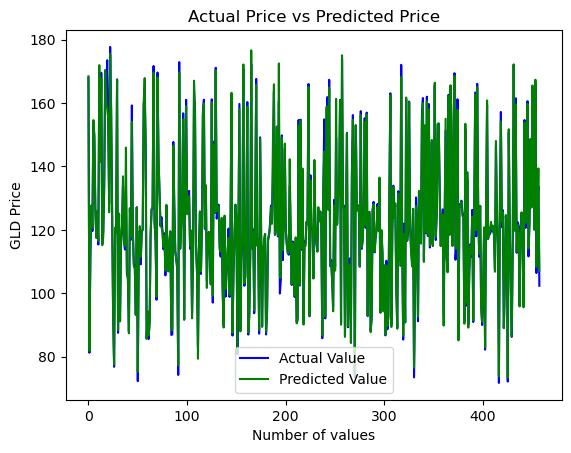

In [48]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()